<a href="https://colab.research.google.com/github/DianaTorresV/Silhouette-Classification-Problem/blob/main/Silhouette_Classification_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Overview
This project, showcases the application of supervised classification models to distinguish between three types of vehicles: bus, car, and van. Based solely on geometric features extracted from their silhouettes.

##Data Description
The data that I will work with in this project contains features extracted from the silhouette of vehicles in different angles. In other words, all of the features that I am going to work with are geometric features extracted from the silhouette. They all are numeric in nature.
Features from the silhouette in the dataset are for the three vehicles.

Here the are:
a bus (which is a double decker bus)
a van (which is a Cheverolet van)
a car (either Saab 9000 or Opel Manta)
This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.
The dataset is available for downloading here https://drive.google.com/file/d/1MnXNtmjQcFjAtM4IUrGlPY3_P820cRD3/view.

The *class* column contains vehicle models. As we discussed previously, there may be 3 values there: *bus* , *van* or *car*. The rest of the columns are numerical columns that describe the silhouette. Here are these columns:



* compactness
* circularity
* distance_circularity
* radius_ratio
* pr.axis_aspect_ratio
* max.length_aspect_ratio
* scatter_ratio
* elongatedness
* pr.axis_rectangularity
* max.length_rectangularity
* scaled_variance
*   scaled_variance.1
*   scaled_radius_of_gyration
*   scaled_radius_of_gyration.1
*   skewness_about
* skewness_about.1
* skewness_about.2
* hollows_ratio












##Problem Description
A chain of car repair shops called “Prospect Auto” asked you for a model that would differentiate all 3 vehicles based on the silhouette. So, eventually, you need to create a classification model that would predict a vehicle class.

#Report and Conclusions

###Data Summary

The dataset includes numeric features describing geometric aspects of vehicle silhouettes from various angles. It contains 218 buses, 429 cars, and 199 vans, which shows a slight class imbalance. All features are numerical.



###Exploratory Data Analysis (EDA)
*   No significant missing values were found (less than 1%), so imputation with the mean was applied.
*   Univariate analysis showed that some features had high skewness (e.g., max.length_aspect_ratio, skew > 6), while others like compactness were symmetric and had potential for class separation.


*  Bivariate analysis revealed high correlations (above 95%) between certain features, which could affect linear models like logistic regression but are less problematic for tree-based models.

Histograms, KDE plots, and boxplots were used to explore skewness, outliers, and class separability. Compactness emerged as a particularly informative feature with distinct distributions across classes and no outliers.

###Model Evaluation

**Logistic Regression**


*   Performed best using only StandardScaler, achieving 93.5% accuracy.
*   Applying log transformation to all features decreased performance due to flattening of useful distributions.

*   Applying log transformation only to highly skewed features slightly improved performance but still didn’t outperform plain StandardScaler.

Logistic regression benefited most from properly scaled, untransformed features—likely because skewness without outliers does not always degrade model performance.

**Decision Tree**

*   Tuned max_depth manually and found that depth = 10 achieved the highest accuracy.
*   Overall accuracy was lower than logistic regression, highlighting the tree's tendency to overfit or underfit depending on depth.


*   Provided useful feature importance insights and basic interpretability.

**Random Forest**



*   Significantly outperformed previous models with 98.2% accuracy and better classification report using only 50 estimators.
*   Demonstrated robustness to skewed features and multicollinearity.

*   Feature importance revealed the most influential variables driving the classification.
*   Reduced overfitting seen in single trees, while maintaining strong generalization.

The model is less interpretable than logistic regression or decision trees but provides superior performance.












###Final Thoughts

*   StandardScaler was sufficient for linear models; log transformation only helped in select cases with skew and outliers.
*   Random Forest is the best-performing model, offering high accuracy, generalization, and insight through feature importance.

*   Class imbalance was not severe, but evaluating precision, recall, and F1-score by class was essential to fully understand model behavior.





###Next Steps

*   Tune models with GridSearchCV for optimal hyperparameters.

*   Use cross-validation for more robust evaluation.

*   Explore feature selection based on importance.
*   Compare with other ensemble techniques like Gradient Boosting.

#Project Solution

##Libraries

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
#modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    classification_report
)

# visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

##Exploratory Data Analysis

In [ ]:
#Data Assessment
df=pd.read_csv('/content/vehicle.csv')
df.head()


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [ ]:
print(df.info())
print(f"The total of null values per column is\n{df.isnull().sum()}")
print(f"The number of duplicated rows is {df.duplicated().sum()}")
print(f"The shape of the dataframe is {df.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [ ]:
df.groupby("class").agg({"class":"count"})




,class
class,
bus,218
car,429
van,199


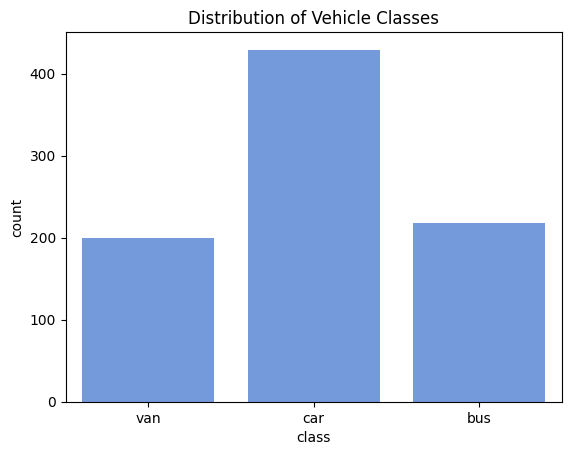

In [ ]:
# Visualize the class distribution (number of instances per vehicle type)
sns.countplot(data=df, x='class',color='cornflowerblue')
plt.title('Distribution of Vehicle Classes')
plt.show()


 The classes are slightly imbalanced, which indicates that accuracy alone can be misleading. Therefore, it is important to analyze additional evaluation metrics. I will examine precision, recall and F1-score to gain a better understanding of the models' performance.

###Univariate Analysis

In [ ]:
#Separate Features and Target
X=df.drop('class', axis=1) #Features
y=df['class'] #Target

In [ ]:
#Computing the basic statistics

X.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,846.000000,841.000000,842.000000,840.000000,844.000000,846.000000,845.000000,845.000000,843.000000,846.000000,843.000000,844.000000,844.000000,842.000000,840.000000,845.000000,845.000000,846.000000
mean,93.678487,44.828775,82.110451,168.888095,61.678910,8.567376,168.901775,40.933728,20.582444,147.998818,188.631079,439.494076,174.709716,72.447743,6.364286,12.602367,188.919527,195.632388
std,8.234474,6.152172,15.778292,33.520198,7.891463,4.601217,33.214848,7.816186,2.592933,14.515652,31.411004,176.666903,32.584808,7.486190,4.920649,8.936081,6.155809,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.500000,173.500000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [ ]:
y.describe()

,class
count,846
unique,3
top,car
freq,429


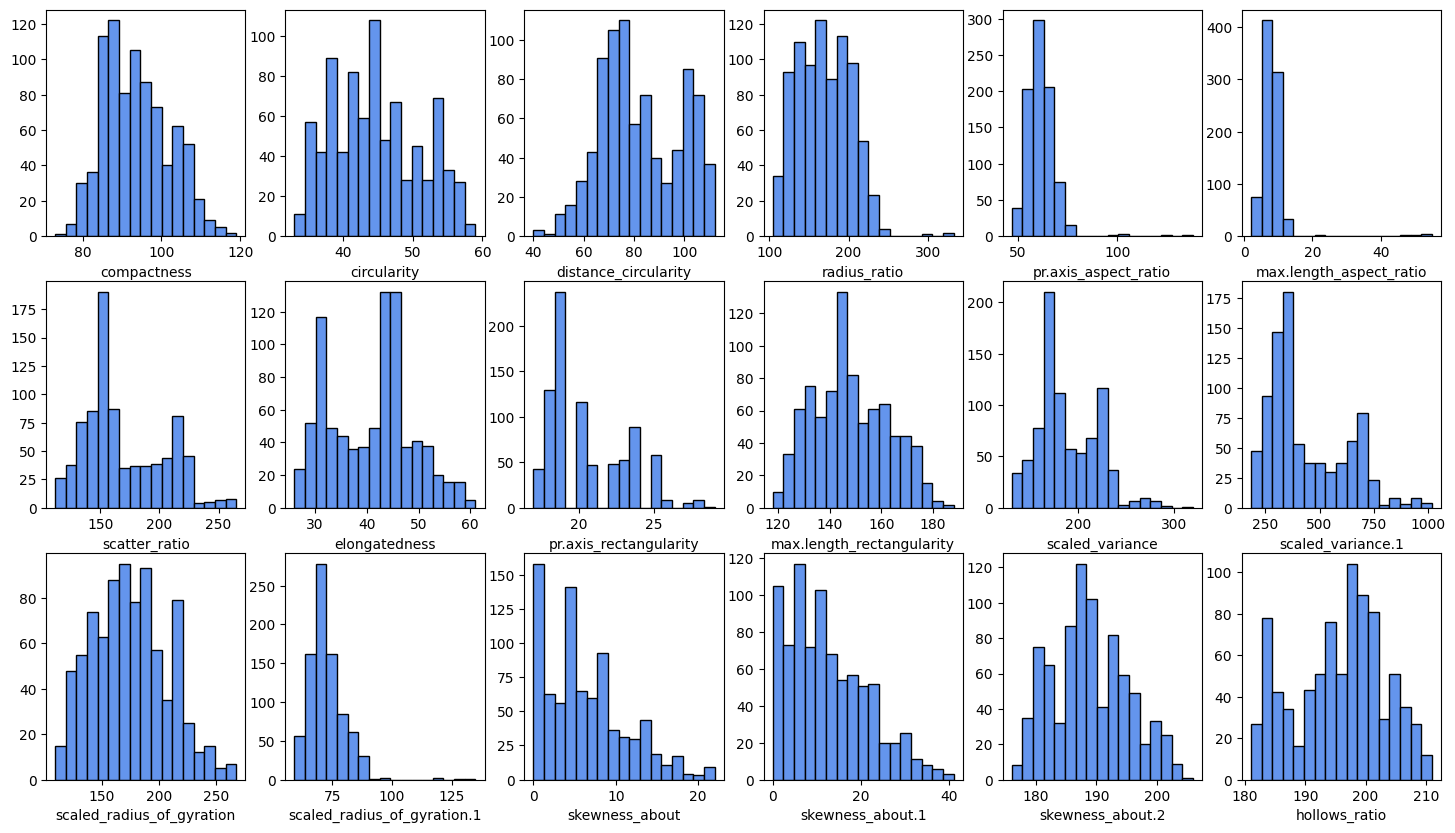

In [ ]:
#Histogram of the features to check their distributions
fig, axs = plt.subplots(3,6, figsize = (18,10))

axs = axs.flatten()

for i, col in enumerate(X):
  axs[i].hist(X[col], bins = 17, edgecolor = 'black',color='cornflowerblue')
  axs[i].set_xlabel(col)



In [ ]:
#Let us compute the skewness of the features
skewness={}
for i in X.columns:
  skewness[i]=X[i].skew()
print(skewness)

{'compactness': np.float64(0.38127063263996497), 'circularity': np.float64(0.2618093968095735), 'distance_circularity': np.float64(0.10658485862853824), 'radius_ratio': np.float64(0.39497766785104316), 'pr.axis_aspect_ratio': np.float64(3.83036207531066), 'max.length_aspect_ratio': np.float64(6.7783936191089476), 'scatter_ratio': np.float64(0.6072705840142789), 'elongatedness': np.float64(0.04784701481809352), 'pr.axis_rectangularity': np.float64(0.7708887331289768), 'max.length_rectangularity': np.float64(0.2563591641353724), 'scaled_variance': np.float64(0.6515982489177394), 'scaled_variance.1': np.float64(0.8420338539822296), 'scaled_radius_of_gyration': np.float64(0.2793173322622561), 'scaled_radius_of_gyration.1': np.float64(2.083496485501098), 'skewness_about': np.float64(0.7765187097549048), 'skewness_about.1': np.float64(0.6880171692243372), 'skewness_about.2': np.float64(0.2493206901281248), 'hollows_ratio': np.float64(-0.22634128032982512)}


As we can see from the histograms and the previous line of code, some features have a skewness greater than one, indicating a highly skewed distribution. While histograms can give a general idea of the shape of the distribution, it would be good to check for the outliers to decide on future scaling of the features.


The total of null values per column is
compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
dtype: int64


<ipython-input-78-3f971416e5e2>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[columns[i]].fillna(X[columns[i]].mean(), inplace=True)


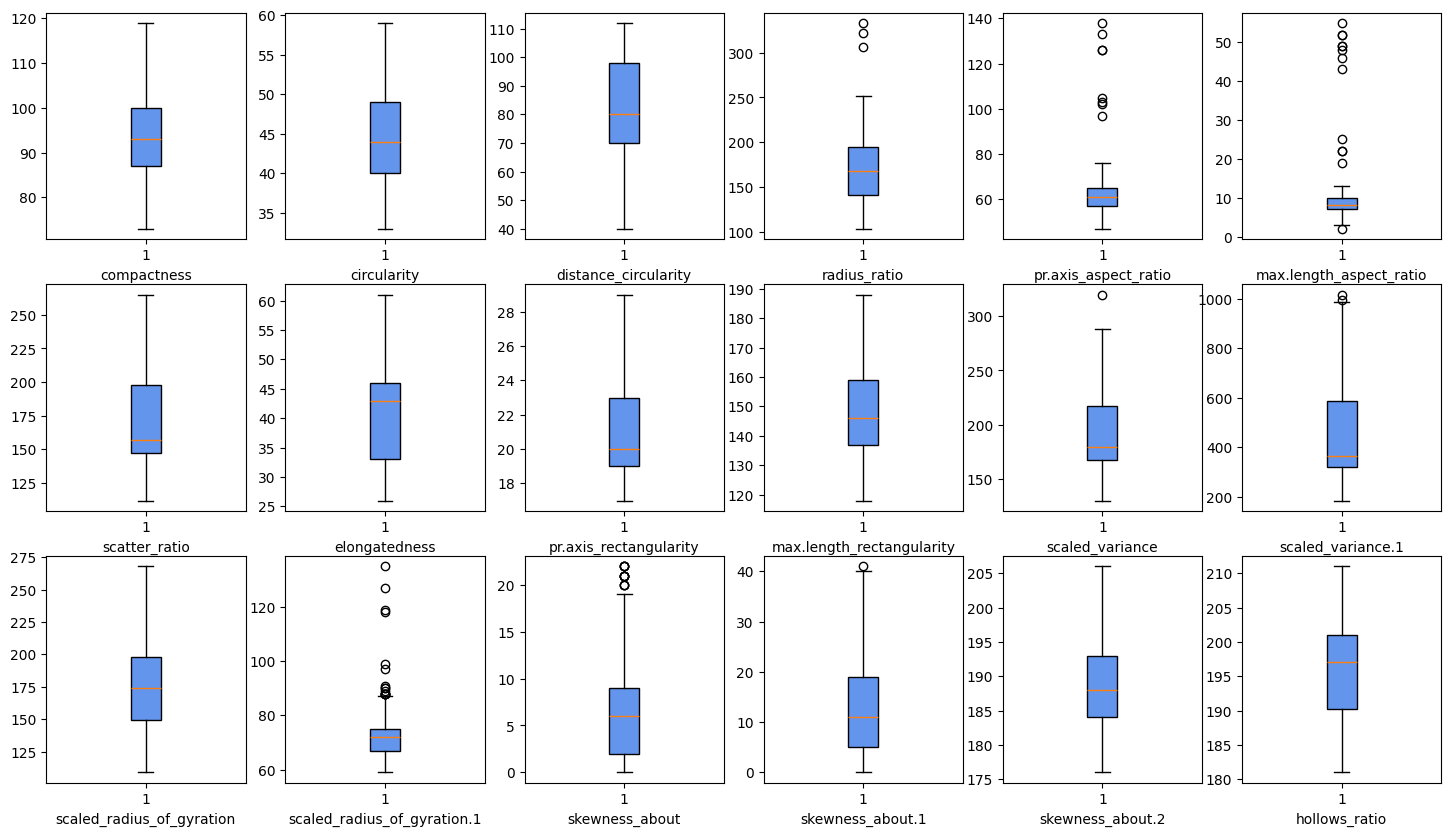

In [ ]:
#Boxplot of the features to detect outliers
columns=list(X.columns) #missing values were causing problems with the plots, so I clean them temporary to analyze.
for i in range(len(columns)-1):
  X[columns[i]].fillna(X[columns[i]].mean(), inplace=True)
print(f"The total of null values per column is\n{X.isnull().sum()}")
fig, axs = plt.subplots(3,6, figsize = (18,10))

axs = axs.flatten()

for i, col in enumerate(X.columns):
  axs[i].boxplot(X[col], patch_artist=True,boxprops=dict(facecolor='cornflowerblue', color='black'))
  axs[i].set_xlabel(col)

Some features with outliers also have a skewness greater than one, indicating a highly skewed distribution. However, there are other features that contain outliers despite having relatively symmetric distributions. In particular, the feature 'max.length_aspect_ratio' has skewness of 6.8 and also present outliers. Let us focus on the specific distribution of the feature "compactness."It would be interesting to analyze whether a logarithmic transformation of some features could help improve the prediction of the first model we will use, which is Logistic Regression, as this model is sensitive to outliers and high skewness.

In [ ]:
#Going back to the original data before cleaning
#Data Assessment
df=pd.read_csv('/content/vehicle.csv')
#Separate Features and Target
X=df.drop('class', axis=1) #Features
y=df['class'] #Target
print(f"The total of null values per column is\n{df.isnull().sum()}")



The total of null values per column is
compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64


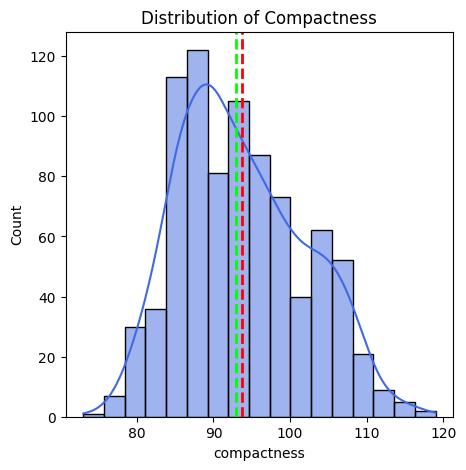

In [ ]:
# Compactness histogram zoom+kde, mean value and median
plt.figure(figsize=(5, 5))
sns.histplot(df['compactness'], kde=True, color='royalblue')
mean_val = X['compactness'].mean()
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label=f'Mean = {mean_val:.2f}')
median=np.median(X['compactness'])
plt.axvline(median, color='lime', linestyle='dashed', linewidth=2, label=f'Median = {median:.2f}')


plt.title('Distribution of Compactness')
plt.show()

<Axes: xlabel='compactness', ylabel='Count'>

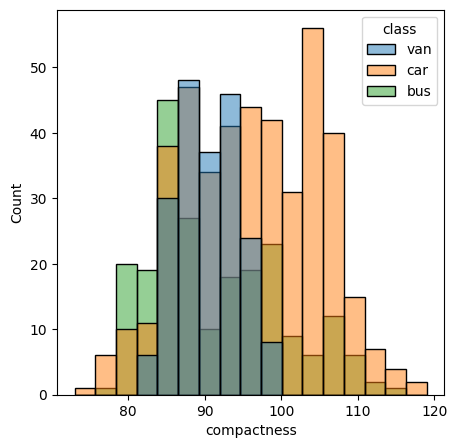

In [ ]:
# Compactness histogram zoom per class
plt.figure(figsize=(5, 5))
sns.histplot(data=df,x=df['compactness'],hue='class', color='blue')

<Axes: xlabel='compactness', ylabel='Density'>

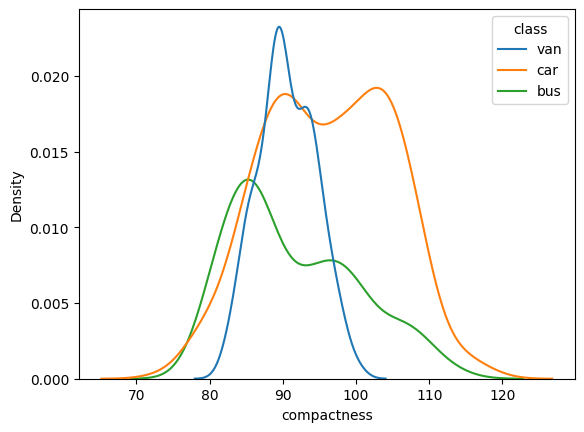

In [ ]:
#Does the feature compactness help us to separe classes?

sns.kdeplot(data=X, x='compactness', hue=y)

<ipython-input-83-1beae5be4158>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='compactness', data=df, palette='viridis')


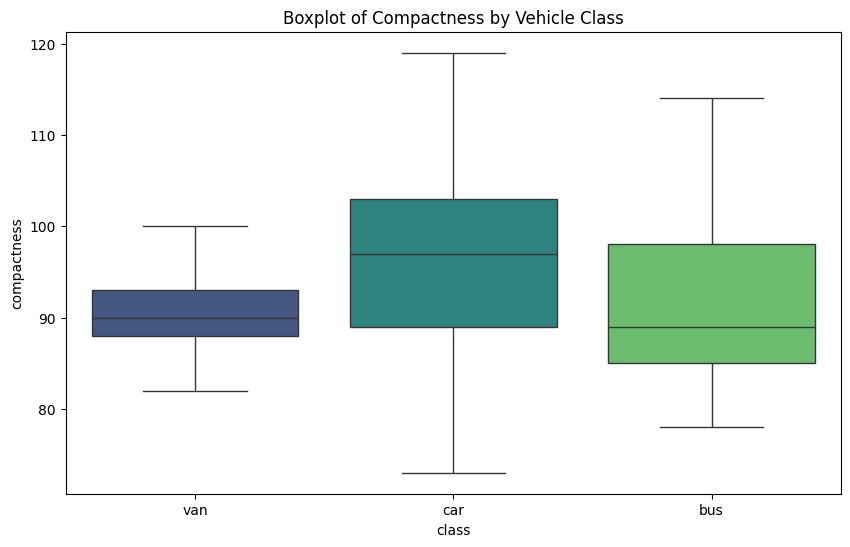

In [ ]:
# Boxplot to visualize the spread and outliers for a feature per class
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='compactness', data=df, palette='viridis')
plt.title('Boxplot of Compactness by Vehicle Class')
plt.show()

The feature 'compactness' has a symmetric distribution with no apparent outliers and exhibits distinct distributions across classes. This makes it a strong candidate for use in our models to help separate the classes.

###Bivariate Analysis

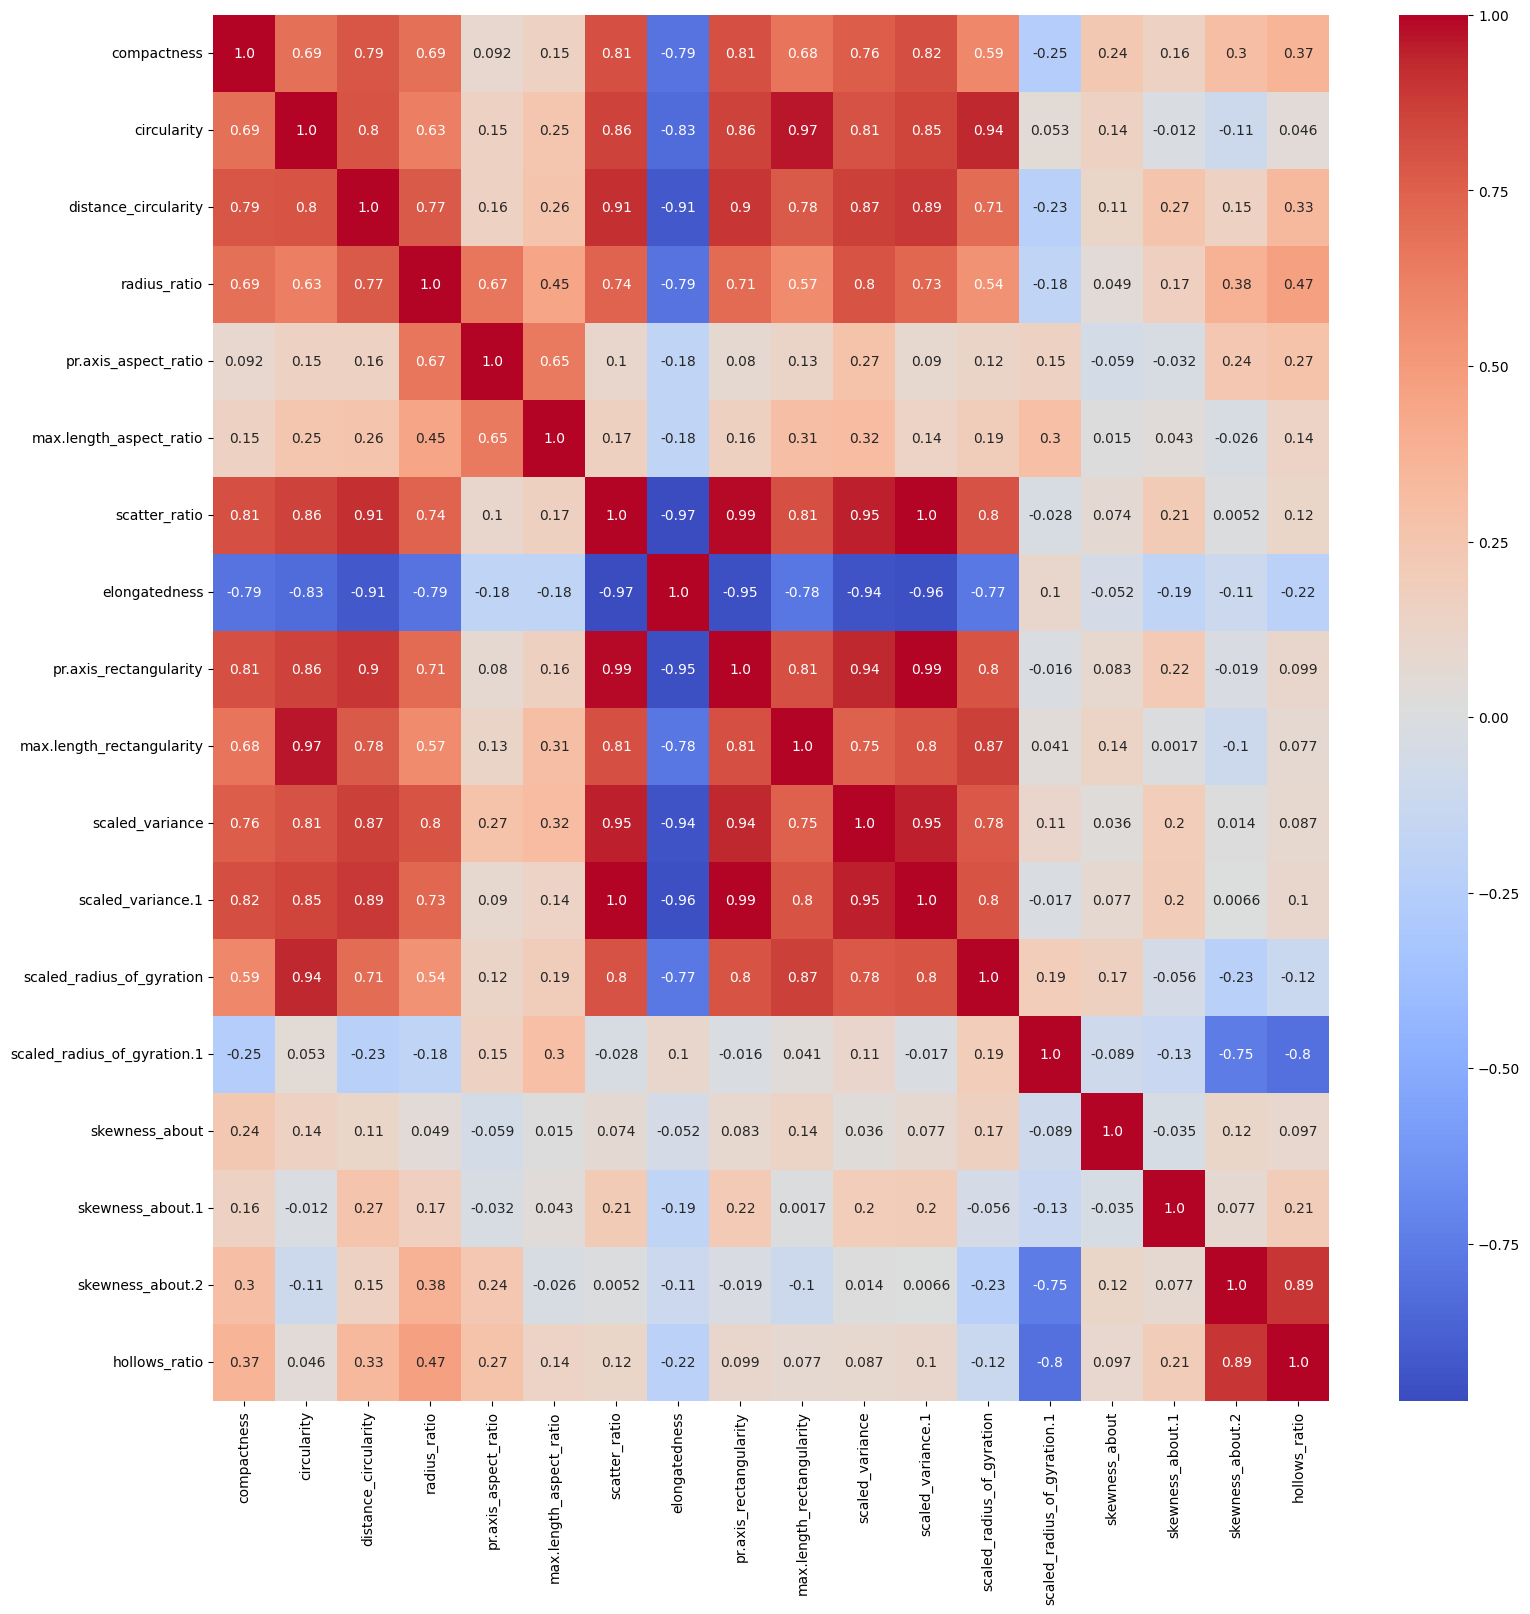

In [ ]:
#Correlation betwenn the features
corr = X.corr()
plt.figure(figsize = (18,18))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt = ".2", annot_kws={"size": 10})
plt.show()


In [ ]:
X.corr().abs()


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,1.000000,0.689786,0.791707,0.691081,0.091779,0.148249,0.812770,0.788736,0.814248,0.676143,0.764361,0.818674,0.585845,0.250603,0.236685,0.157670,0.298528,0.365552
circularity,0.689786,1.000000,0.797180,0.625051,0.154283,0.251407,0.858265,0.827246,0.856603,0.965729,0.806791,0.850863,0.935950,0.053080,0.144968,0.011869,0.106339,0.045652
distance_circularity,0.791707,0.797180,1.000000,0.771748,0.158684,0.264621,0.907949,0.913020,0.896273,0.775149,0.865710,0.890541,0.706950,0.227001,0.114665,0.266049,0.146027,0.333648
radius_ratio,0.691081,0.625051,0.771748,1.000000,0.665363,0.450486,0.738480,0.792946,0.712744,0.571083,0.798294,0.725598,0.541325,0.181520,0.049112,0.174469,0.382912,0.472339
pr.axis_aspect_ratio,0.091779,0.154283,0.158684,0.665363,1.000000,0.648861,0.103832,0.183492,0.079566,0.127322,0.273738,0.089750,0.122454,0.152860,0.058539,0.032180,0.240201,0.267760
max.length_aspect_ratio,0.148249,0.251407,0.264621,0.450486,0.648861,1.000000,0.165998,0.180053,0.161603,0.305943,0.319033,0.143745,0.189752,0.295638,0.015446,0.043491,0.026184,0.143919
scatter_ratio,0.812770,0.858265,0.907949,0.738480,0.103832,0.165998,1.000000,0.973504,0.992078,0.810017,0.951672,0.996328,0.800577,0.028006,0.074376,0.213512,0.005171,0.118504
elongatedness,0.788736,0.827246,0.913020,0.792946,0.183492,0.180053,0.973504,1.000000,0.950405,0.776150,0.938313,0.956488,0.766671,0.103535,0.052243,0.186027,0.114846,0.216769
pr.axis_rectangularity,0.814248,0.856603,0.896273,0.712744,0.079566,0.161603,0.992078,0.950405,1.000000,0.813135,0.938182,0.992316,0.798522,0.015711,0.083219,0.215200,0.019066,0.099481
max.length_rectangularity,0.676143,0.965729,0.775149,0.571083,0.127322,0.305943,0.810017,0.776150,0.813135,1.000000,0.746657,0.797485,0.866554,0.041283,0.136077,0.001660,0.104437,0.076770


In [ ]:
#List of features with correlation greater than 95% by pairs
corr_matrix = X.corr().abs()
colnames=set()
for i in range(len(corr_matrix.columns)):
  for j in range(i):
    if corr_matrix.iloc[i, j] > 0.95:
      colname_pair= (corr_matrix.columns[i],corr_matrix.columns[j])
      colnames.add(colname_pair)
print(colnames)


{('max.length_rectangularity', 'circularity'), ('pr.axis_rectangularity', 'scatter_ratio'), ('scaled_variance.1', 'elongatedness'), ('elongatedness', 'scatter_ratio'), ('pr.axis_rectangularity', 'elongatedness'), ('scaled_variance', 'scatter_ratio'), ('scaled_variance.1', 'pr.axis_rectangularity'), ('scaled_variance.1', 'scatter_ratio')}


Some pairs of features are closely related to each other (correlation more than 95%). This could cause problems for the logistic model, which assumes that features do not depend on each other, if we do not scale the features properly. However, this is not a problem for the Decision Tree and Random Forest models.

The scatter plot below shows how two features that are highly correlated might not be enough to separate the classes, and why we may need to combine more features or use non-linear models.

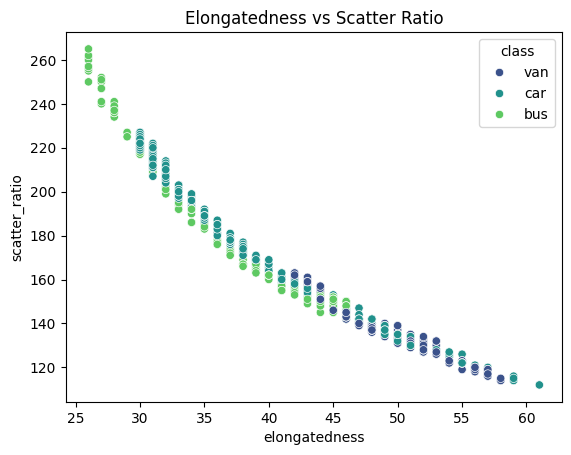

In [ ]:
# Plotting a few features against each other (scatter plot for two features)
sns.scatterplot(x='elongatedness', y='scatter_ratio', hue='class', data=df, palette='viridis')
plt.title('Elongatedness vs Scatter Ratio')
plt.show()

##Data Cleaning
Given that the proportion of missing values per column is less than 1%, it is decided to replace them with the mean of their respective columns.  It should be noted that this action was not preceded by a separation of the data into training and testing sets.

In [ ]:
#Data Cleaning: The mean of each column will replace the missing values in that column.
#X contains only the features

columns=list(X.columns)
for i in range(len(columns)-1):
  X[columns[i]].fillna(X[columns[i]].mean(), inplace=True)
print(f"The total of null values per column is\n{X.isnull().sum()}")

The total of null values per column is
compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
dtype: int64


<ipython-input-88-eae14c64cca1>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[columns[i]].fillna(X[columns[i]].mean(), inplace=True)


##Train-Test split
**df** is the original data frame features plus target. For EDA and data cleaning:

**X** is **df** without the target column

**y** is the target column

After the EDA and cleaning, clean features and target were concatenated again in the variable **df**

Now, after the next line of code:

**X_train** is the train set of features without the target

**y_train** is the target, **X_test** and **y_test** are obtained in a similar way.

In [ ]:
df=pd.concat([X,y],axis=1)
# Split data into train and test sets
train, test = train_test_split(df, test_size=0.2, random_state=42)

X_train = train.drop('class', axis=1)
y_train = train['class']

# Encode the target variable
X_test = test.drop('class', axis=1)
y_test = test['class']


##Logistic Regression

###StandardScaler
First, because the model is sensitive to data that is not scaled, we will use StandardScaler. I would like to compare the results after scaling the data using a logarithm.

**X_train_scaled** is the **X_train** (features of the train) after the standard scalation

**X_test_scaled**  is the **X_train** (features of the test) after the standard scalation

**model** is the logistic regression that was fitted with the previous variables.

**y_pred** is the target prediction using **model** and **X_test_scaled**


In [ ]:
# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [ ]:
# Create a logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')


              precision    recall  f1-score   support

         bus       0.94      0.90      0.92        52
         car       0.95      0.94      0.94        78
         van       0.91      0.97      0.94        40

    accuracy                           0.94       170
   macro avg       0.93      0.94      0.93       170
weighted avg       0.94      0.94      0.94       170

Accuracy: 0.9352941176470588


In [ ]:
# Get class labels in order
labels = sorted(y_test.unique())  # Or: labels = clf.classes_ if using a fitted model
print(labels)

['bus', 'car', 'van']


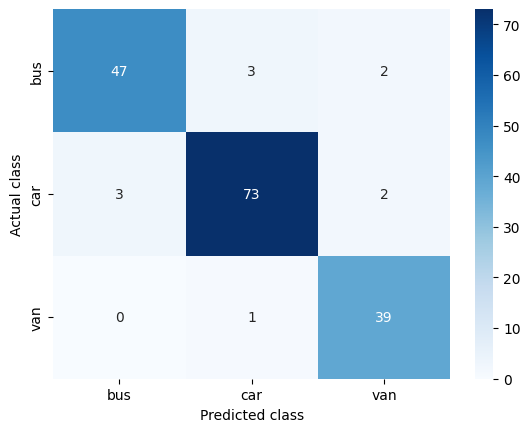

In [ ]:

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred,labels=labels)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted class')
plt.ylabel('Actual class')
plt.show()

<Axes: title={'center': 'Feature Coefficients'}>

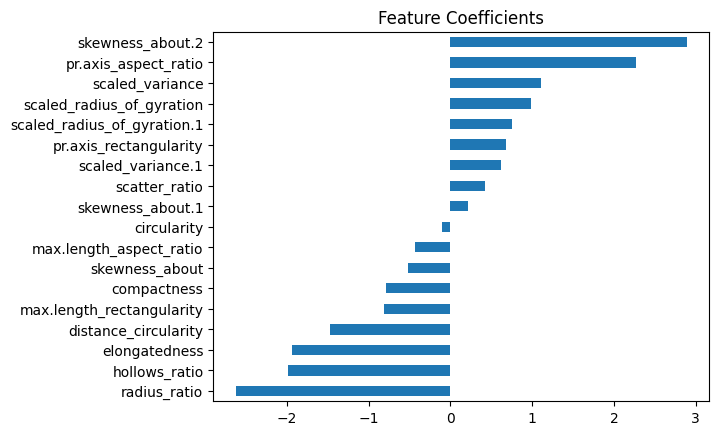

In [ ]:
coefficients = pd.Series(model.coef_[0], index=X.columns)
coefficients.sort_values().plot(kind='barh', title='Feature Coefficients')

A positive coefficient for a feature means that higher values of that feature are more likely to be associated with the positive class. For our model, the most important features were 'skewness_about.2' and 'pr.axis_aspect_ratio'.

###Log transformation+Scaling

I want to check whether I can safely apply the log1p transformation to the features, which requires all values to be greater than -1. To simplify the process, I will perform this check on the complete features dataset before splitting it into training and test sets. This way, I can ensure that the transformation will not produce any errors or undefined values. Using the information below, note that the transformation will give us positive values as well.

In [ ]:
for col in X.columns:
  count=X[X[col]<-1].sum()
print(count)

compactness                    0.0
circularity                    0.0
distance_circularity           0.0
radius_ratio                   0.0
pr.axis_aspect_ratio           0.0
max.length_aspect_ratio        0.0
scatter_ratio                  0.0
elongatedness                  0.0
pr.axis_rectangularity         0.0
max.length_rectangularity      0.0
scaled_variance                0.0
scaled_variance.1              0.0
scaled_radius_of_gyration      0.0
scaled_radius_of_gyration.1    0.0
skewness_about                 0.0
skewness_about.1               0.0
skewness_about.2               0.0
hollows_ratio                  0.0
dtype: float64


In [ ]:
#Log Scaling
def log_scaling(df, columns):

  for col in columns:
    df[col] = np.log1p(df[col])
  return df


In [ ]:
X_train.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
665,90,47.0,85.0,161.0,64.0,10,163.0,42.0,20.0,160,177.0,389.0,185.0,73.0,9.0,0.0,185.0,195
633,102,52.0,101.0,213.0,64.0,10,203.0,33.0,23.0,157,214.0,616.0,186.0,65.0,0.0,19.0,193.0,203
570,105,53.0,108.0,206.0,63.0,12,222.0,31.0,25.0,168,226.0,712.0,201.0,71.0,15.0,35.0,189.0,203
788,115,52.0,100.0,203.0,62.0,10,217.0,31.0,24.0,165,229.0,697.0,214.0,72.0,14.0,4.0,188.0,197
539,109,55.0,96.0,191.0,57.0,6,241.0,28.0,26.0,170,267.0,857.0,242.0,85.0,8.0,9.0,184.0,184


**X_train_log** is the X_train(features of the train) after the log transformation

**X_test_log**  is the X_train(features of the test) after the log transformation

In [ ]:
X_train_log = log_scaling(X_train.copy(), X_train.columns)
X_test_log = log_scaling(X_test.copy(), X_train.columns)

In [ ]:
X_train_log.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
665,4.510860,3.871201,4.454347,5.087596,4.174387,2.397895,5.099866,3.761200,3.044522,5.081404,5.181784,5.966147,5.225747,4.304065,2.302585,0.000000,5.225747,5.278115
633,4.634729,3.970292,4.624973,5.365976,4.174387,2.397895,5.318120,3.526361,3.178054,5.062595,5.370638,6.424869,5.231109,4.189655,0.000000,2.995732,5.267858,5.318120
570,4.663439,3.988984,4.691348,5.332719,4.158883,2.564949,5.407172,3.465736,3.258097,5.129899,5.424950,6.569481,5.308268,4.276666,2.772589,3.583519,5.247024,5.318120
788,4.753590,3.970292,4.615121,5.318120,4.143135,2.397895,5.384495,3.465736,3.218876,5.111988,5.438079,6.548219,5.370638,4.290459,2.708050,1.609438,5.241747,5.288267
539,4.700480,4.025352,4.574711,5.257495,4.060443,1.945910,5.488938,3.367296,3.295837,5.141664,5.590987,6.754604,5.493061,4.454347,2.197225,2.302585,5.220356,5.220356


In [ ]:
#Let us compute the skewness of the training features, we can see they are less skewed
skewness={}
for i in X_train_log.columns:
  skewness[i]=X_train_log[i].skew()
print(skewness)

{'compactness': np.float64(0.20611577088750602), 'circularity': np.float64(0.035689591626937786), 'distance_circularity': np.float64(-0.24599578418206897), 'radius_ratio': np.float64(-0.07619437680637027), 'pr.axis_aspect_ratio': np.float64(2.027735259965167), 'max.length_aspect_ratio': np.float64(1.7236985269373888), 'scatter_ratio': np.float64(0.2997698961286562), 'elongatedness': np.float64(-0.21897745225208923), 'pr.axis_rectangularity': np.float64(0.5860534083591193), 'max.length_rectangularity': np.float64(0.06746957209553422), 'scaled_variance': np.float64(0.23710837563920723), 'scaled_variance.1': np.float64(0.26231333305710863), 'scaled_radius_of_gyration': np.float64(-0.15189508834969753), 'scaled_radius_of_gyration.1': np.float64(1.3404774707157303), 'skewness_about': np.float64(-0.6331546147606524), 'skewness_about.1': np.float64(-0.8808498616443772), 'skewness_about.2': np.float64(0.14968880298453938), 'hollows_ratio': np.float64(-0.3259283909234944)}


**X_train_log_scaled** is the X_train_log(features of the train) after the standard scalation

**X_test_log_scaled**  is the X_train_log(features of the test) after the standard scalation

In [ ]:
# Normalize the log-features using StandardScaler
scaler = StandardScaler()
X_train_log_scaled = scaler.fit_transform(X_train_log)
X_test_log_scaled= scaler.transform(X_test_log)

In [ ]:
# Create a logistic regression model
model_log = LogisticRegression()
model_log.fit(X_train_log_scaled, y_train)

LogisticRegression()

In [ ]:
# Predict on the test set
y_pred_log = model_log.predict(X_test_log_scaled)

# Evaluate the model
print(classification_report(y_test, y_pred_log))
print(f'Accuracy: {accuracy_score(y_test, y_pred_log)}')

              precision    recall  f1-score   support

         bus       0.92      0.87      0.89        52
         car       0.94      0.92      0.93        78
         van       0.91      1.00      0.95        40

    accuracy                           0.92       170
   macro avg       0.92      0.93      0.92       170
weighted avg       0.92      0.92      0.92       170

Accuracy: 0.9235294117647059


<Axes: title={'center': 'Feature Coefficients'}>

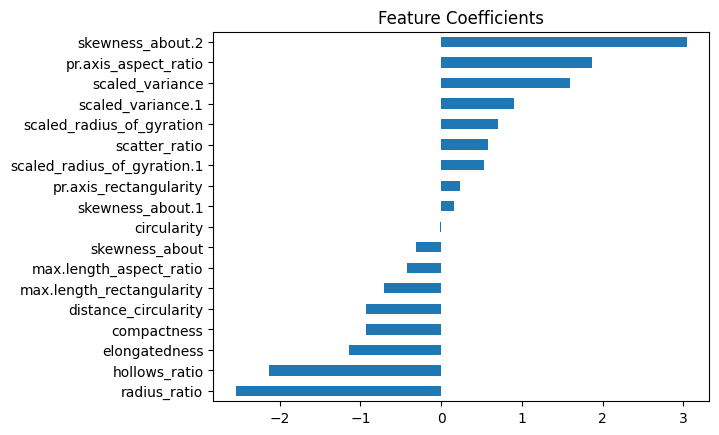

In [ ]:
coefficients = pd.Series(model_log.coef_[0], index=X.columns)
coefficients.sort_values().plot(kind='barh', title='Feature Coefficients')

A positive coefficient for a feature means that higher values of that feature are more likely to be associated with the positive class. For our model, the most important features were 'skewness_about.2' and 'pr.axis_aspect_ratio'.

We observed that applying a logarithmic transformation to all features worsened the model's performance. This likely occurred because some features already had a normal distribution or low skewness. Therefore, we decided to apply the logarithmic transformation only to features with high skewness. Specifically, those with skewness greater than 1 or less than -1.

###Log transformation for selected features+Scaling

In [ ]:
#Let us show the features with the skewness greater than 1 (I am not checking skew<-1 because after the first exploration I learned that all the skew are greater than -1)
skewness={}
for i in X.columns:
  if X[i].skew()>1:
    skewness[i]=X[i].skew()
features_to_log=skewness.keys() #To save the names of the columns that I will use

print(skewness)
print(features_to_log)

{'pr.axis_aspect_ratio': np.float64(3.8348815765451163), 'max.length_aspect_ratio': np.float64(6.7783936191089476), 'scaled_radius_of_gyration.1': np.float64(2.088421904919729)}
dict_keys(['pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scaled_radius_of_gyration.1'])


In [ ]:
for i in features_to_log:
  print(i)

pr.axis_aspect_ratio
max.length_aspect_ratio
scaled_radius_of_gyration.1


We will then attempt to improve the Logistic Regression model by applying a logarithmic transformation only to the previously identified skewed features, followed by standard scaling applied to all features.

In [ ]:
#Separation of the features
X_1_train=X_train[features_to_log]
X_2_train=X_train.drop(features_to_log,axis=1)

X_1_test=X_test[features_to_log]
X_2_test=X_test.drop(features_to_log,axis=1)

In [ ]:
X_1_train_log = log_scaling(X_1_train.copy(), X_1_train.columns)
X_1_test_log = log_scaling(X_1_test.copy(), X_1_train.columns)

Now we use standard scaler for the concatenation of **X_1_train_log** and **X_2_train**, remember that **X_1_train_log** contains the selected columns after the logarithmic transformation and **X_2_train** contains the columns that were not selected for the logarithmic transformation.

In [ ]:
LX_train=pd.concat([X_1_train_log,X_2_train],axis=1)
LX_test=pd.concat([X_1_test_log,X_2_test],axis=1)

In [ ]:
# Normalize the features and log features using StandardScaler
scaler = StandardScaler()
LX_train_scaled = scaler.fit_transform(LX_train)
LX_test_scaled= scaler.transform(LX_test)

In [ ]:
# Create a logistic regression model
model_L = LogisticRegression()
model_L.fit(LX_train_scaled, y_train)

LogisticRegression()

In [ ]:
# Predict on the test set
y_pred_L = model_L.predict(LX_test_scaled)

# Evaluate the model
print(classification_report(y_test, y_pred_L))
print(f'Accuracy: {accuracy_score(y_test, y_pred_L)}')

              precision    recall  f1-score   support

         bus       0.94      0.88      0.91        52
         car       0.94      0.94      0.94        78
         van       0.91      0.97      0.94        40

    accuracy                           0.93       170
   macro avg       0.93      0.93      0.93       170
weighted avg       0.93      0.93      0.93       170

Accuracy: 0.9294117647058824


<Axes: title={'center': 'Feature Coefficients'}>

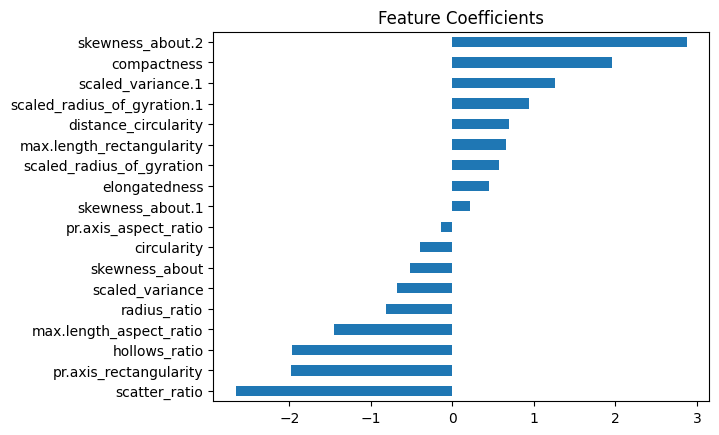

In [ ]:
coefficients = pd.Series(model_L.coef_[0], index=X.columns)
coefficients.sort_values().plot(kind='barh', title='Feature Coefficients')

A positive coefficient for a feature means that higher values of that feature are more likely to be associated with the positive class. For our model, the most important features were 'skewness_about.2' and 'compactness'.

Let's compare the classification reports for the Logistic Regression model.

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print('Logistic Regression model with StandardScale')
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')


# Predict on the test set
y_pred_log = model_log.predict(X_test_log_scaled)

# Evaluate the model
print('Logistic Regression model with Log Transformation plus StandardScale')
print(classification_report(y_test, y_pred_log))
print(f'Accuracy: {accuracy_score(y_test, y_pred_log)}')

# Predict on the test set
y_pred_L = model_L.predict(LX_test_scaled)

# Evaluate the model
print('Logistic Regression model with Log Transformation for skewed features plus StandardScale')
print(classification_report(y_test, y_pred_L))
print(f'Accuracy: {accuracy_score(y_test, y_pred_L)}')

Logistic Regression model with StandardScale
              precision    recall  f1-score   support

         bus       0.94      0.90      0.92        52
         car       0.95      0.94      0.94        78
         van       0.91      0.97      0.94        40

    accuracy                           0.94       170
   macro avg       0.93      0.94      0.93       170
weighted avg       0.94      0.94      0.94       170

Accuracy: 0.9352941176470588
Logistic Regression model with Log Transformation plus StandardScale
              precision    recall  f1-score   support

         bus       0.92      0.87      0.89        52
         car       0.94      0.92      0.93        78
         van       0.91      1.00      0.95        40

    accuracy                           0.92       170
   macro avg       0.92      0.93      0.92       170
weighted avg       0.92      0.92      0.92       170

Accuracy: 0.9235294117647059
Logistic Regression model with Log Transformation for skewed featu

###Conclusions:


*   The model worked better with only StandardScaler
*   Applying Log transformation to all the features resulted in worse performance of the model, which was expected because there were only few features with skewed distribution and outliers.


*   Applying Log transformation to selected features (skewed features) improve the previous model but did not improve the model with only standardscaler, which was also expected because the distributions have not outliers so log flat the data making to the model more difficult to predict the classes and at the same time the model did not get improve of the features probably because there were not outliers




##Decision Tree

In [ ]:
df=pd.concat([X,y],axis=1)
# Split data into train and test sets
train, test = train_test_split(df, test_size=0.2, random_state=42)

X_train = train.drop('class', axis=1)
y_train = train['class']

# Encode the target variable
X_test = test.drop('class', axis=1)
y_test = test['class']


In [ ]:
# Creating and training the Decision Tree model
model_tree = DecisionTreeClassifier(random_state=42)
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Making predictions on the test set
y_pred = model_tree.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)

class_report = classification_report(y_test, y_pred)

# Printing evaluation metrics
print("Accuracy:", accuracy)

print("Classification Report:\n", class_report)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.9176470588235294
Classification Report:
               precision    recall  f1-score   support

         bus       0.94      0.92      0.93        52
         car       0.89      0.94      0.91        78
         van       0.95      0.88      0.91        40

    accuracy                           0.92       170
   macro avg       0.93      0.91      0.92       170
weighted avg       0.92      0.92      0.92       170

Accuracy: 0.9176470588235294


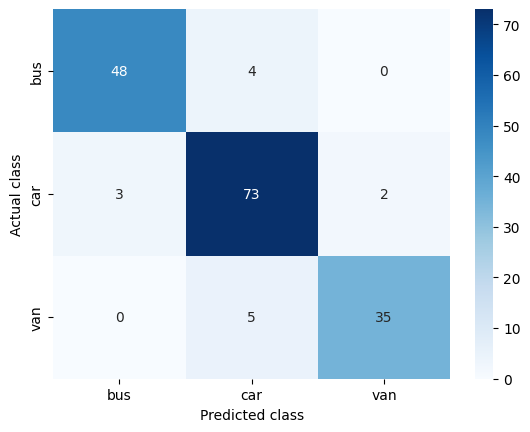

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred,labels=labels)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted class')
plt.ylabel('Actual class')
plt.show()

In [ ]:
#How important was each feature for the model
print(model_tree.feature_importances_)
df.head()

[0.02862771 0.00172364 0.05790767 0.00661948 0.02334038 0.26661901
 0.01060967 0.00360934 0.018763   0.0678808  0.01798036 0.33227819
 0.01044658 0.05598308 0.03979202 0.0229693  0.01012301 0.02472676]


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


<Axes: title={'center': 'Feature Importances'}>

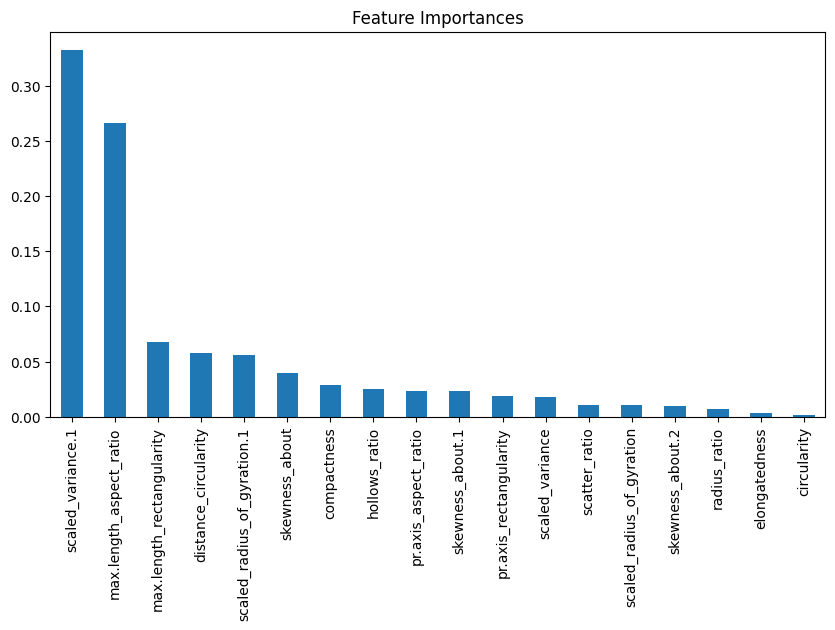

In [ ]:
importances = pd.Series(model_tree.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), title='Feature Importances')

Feature Importance

The feature 'scaled_variance.1' contributed the most to the decision splits in the model, accounting for approximately 33% of the splits. The second most important feature was 'max.length_aspect_ratio', which was responsible for about 26% of the decision-making process. This indicates that these two features played a significant role in determining the classification outcomes in the model.

In [ ]:
model_tree.classes_

array(['bus', 'car', 'van'], dtype=object)

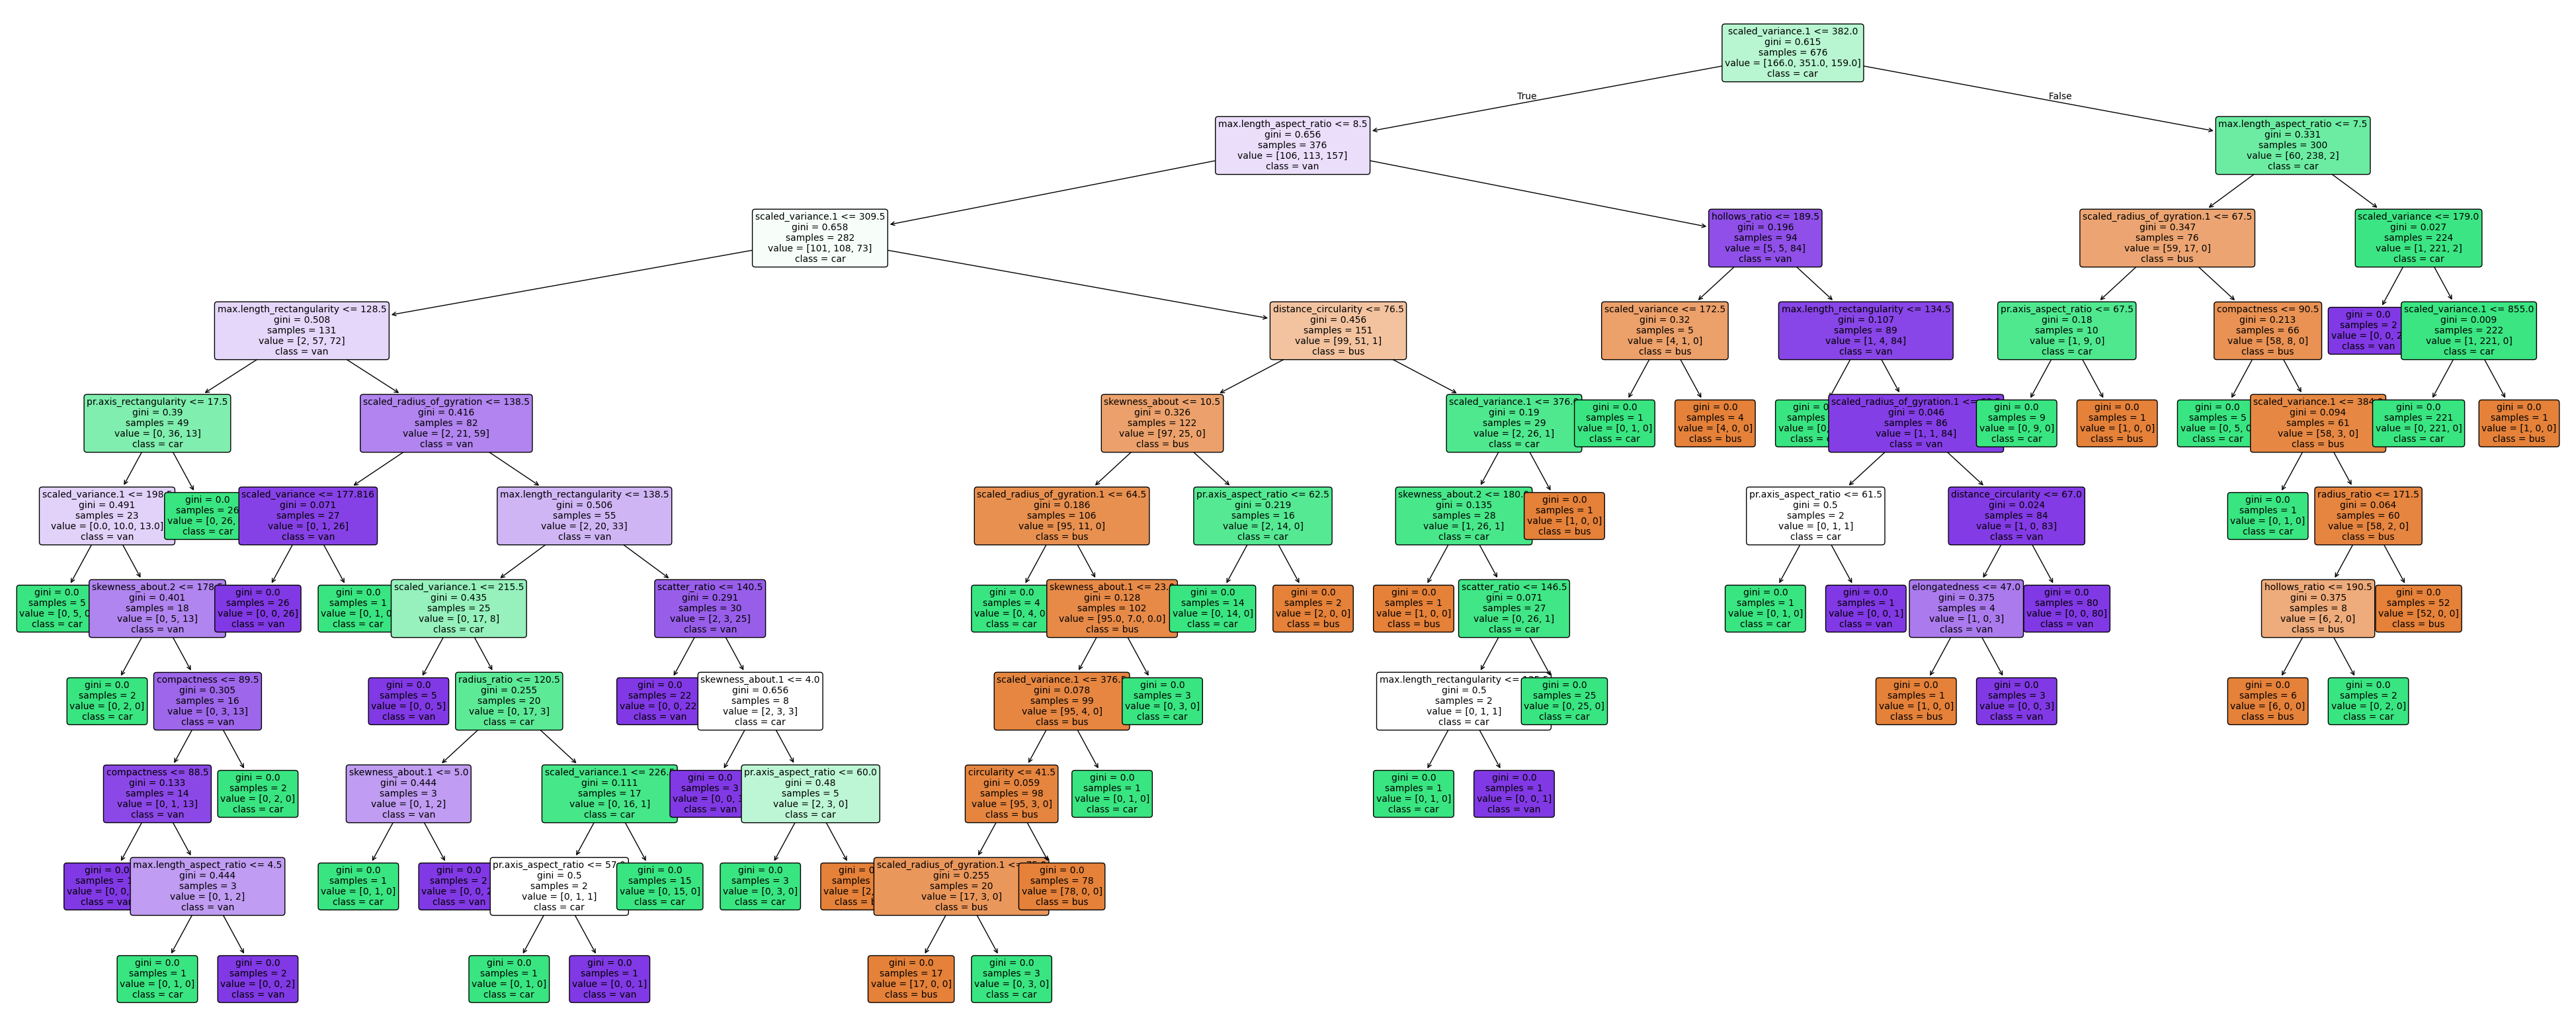

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(50, 20))
plot_tree(model_tree,
          feature_names=X.columns,
          class_names=['bus', 'car', 'van'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.show()

In [ ]:
model_tree.get_depth()

10

###Manually tuning hyperparameter

We explored variations of the max_depth parameter, considering that the initial model used a max_depth of 10. The goal was to determine whether a tree using fewer splits could achieve similar performance while reducing model complexity and the risk of overfitting.

In [ ]:
for depth in range(1, 11):
    model_tree_d = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model_tree_d.fit(X_train, y_train)
    # Making predictions on the test set
    y_pred = model_tree_d.predict(X_test)


    acc = accuracy_score(y_test, y_pred)
    print(f"max_depth={depth}: accuracy={acc:.6f}")

max_depth=1: accuracy=0.558824
max_depth=2: accuracy=0.688235
max_depth=3: accuracy=0.841176
max_depth=4: accuracy=0.876471
max_depth=5: accuracy=0.888235
max_depth=6: accuracy=0.911765
max_depth=7: accuracy=0.905882
max_depth=8: accuracy=0.905882
max_depth=9: accuracy=0.911765
max_depth=10: accuracy=0.917647


So, after manually evaluating model performance across different values of max_depth, we found that a value of 10 provides the best balance—matching the initial accuracy while maintaining a reasonable level of model complexity.



##Random Forest

Random Forest is not sensitive to multicollinearity among features, making it particularly well suited for datasets with highly correlated variables. Therefore, I expected it to provide a more reliable estimate for our classification task. I trained a Random Forest classifier to enhance predictive performance by combining multiple decision trees. This ensemble approach helps reduce overfitting and increases the model's generalization ability, as it aggregates the predictions of many trees to produce more stable and accurate results.










In [ ]:
model_forest = RandomForestClassifier(random_state=42)
model_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Making predictions on the test set
y_pred = model_forest.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)

class_report = classification_report(y_test, y_pred)

# Printing evaluation metrics
print("Accuracy:", accuracy)

print("Classification Report:\n", class_report)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.9764705882352941
Classification Report:
               precision    recall  f1-score   support

         bus       1.00      0.98      0.99        52
         car       0.97      0.97      0.97        78
         van       0.95      0.97      0.96        40

    accuracy                           0.98       170
   macro avg       0.98      0.98      0.98       170
weighted avg       0.98      0.98      0.98       170

Accuracy: 0.9764705882352941


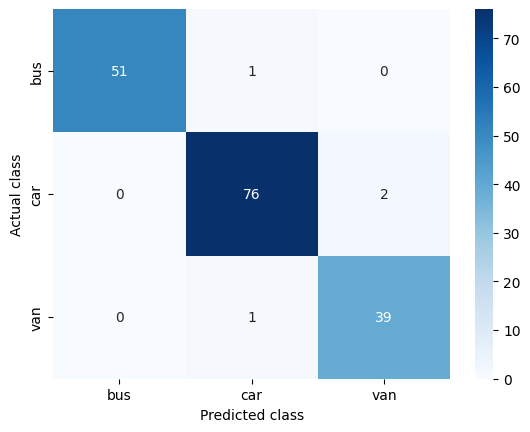

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred,labels=labels)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted class')
plt.ylabel('Actual class')
plt.show()

In [ ]:
print("Number of trees (n_estimators):", len(model_forest.estimators_))

Number of trees (n_estimators): 100


Now, I would like to explore whether I can reduce the number of estimators without reducing the performance of the model.

###Tuned hyperparameters for random forest

In [ ]:
for n in [10,20,30,40,50,60,100]:
  model_rf = RandomForestClassifier(n_estimators=n, random_state=42)
  model_rf.fit(X_train, y_train)
  # Making predictions on the test set
  y_pred = model_rf.predict(X_test)
  # Evaluating the model
  accuracy = accuracy_score(y_test, y_pred)
  print(f"n_estimators={n},→ accuracy={accuracy:.6f}")

n_estimators=10,→ accuracy=0.952941
n_estimators=20,→ accuracy=0.976471
n_estimators=30,→ accuracy=0.976471
n_estimators=40,→ accuracy=0.976471
n_estimators=50,→ accuracy=0.982353
n_estimators=60,→ accuracy=0.982353
n_estimators=100,→ accuracy=0.976471


We can actually see that the model has a better accuracy for n_estimators=50

###Optimal Random Forest after tuning

n_estimators=50

In [ ]:
model_optimalforest = RandomForestClassifier(n_estimators=50,random_state=42)
model_optimalforest.fit(X_train, y_train)
# Making predictions on the test set
y_pred = model_optimalforest.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)

class_report = classification_report(y_test, y_pred)

print("Classification Report:\n", class_report)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Classification Report:
               precision    recall  f1-score   support

         bus       1.00      0.98      0.99        52
         car       0.99      0.97      0.98        78
         van       0.95      1.00      0.98        40

    accuracy                           0.98       170
   macro avg       0.98      0.99      0.98       170
weighted avg       0.98      0.98      0.98       170

Accuracy: 0.9823529411764705


In [ ]:
#How important was each feature for the model
print(model_optimalforest.feature_importances_)
df.head()

[0.03695753 0.02971574 0.07674124 0.03194905 0.05866203 0.1374694
 0.07782794 0.09413422 0.02599398 0.08175222 0.05643392 0.08720814
 0.02873467 0.06438615 0.02203611 0.02647426 0.02873217 0.03479123]


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


Feature 6 (max.length_aspect_ratio) was used the most in decision splits (14%)

Feature 8 (elongatedness) was second most in decision splits (9%)

<Axes: title={'center': 'Feature Importances'}>

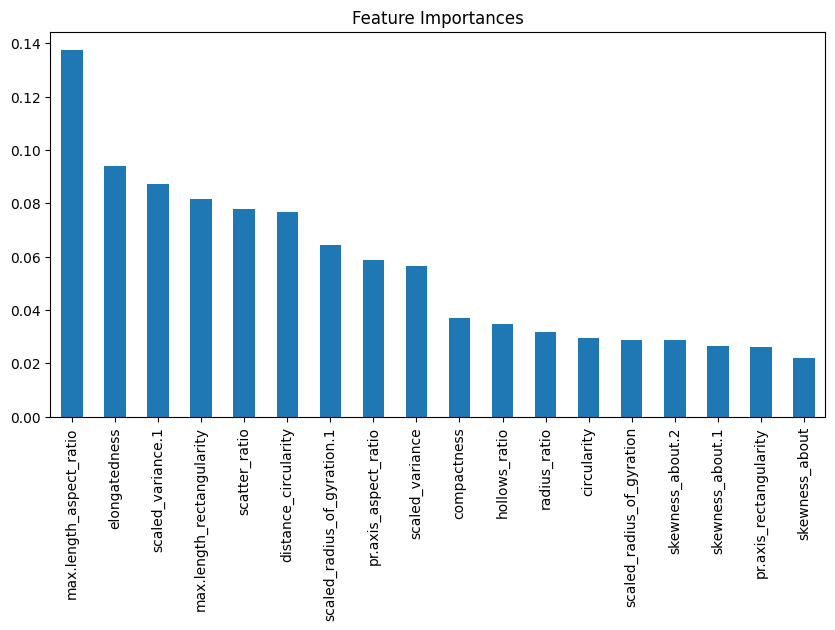

In [ ]:
importances = pd.Series(model_optimalforest.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), title='Feature Importances')


###Conclusions:

After comparing various models, I implemented a Random Forest classifier due to its robustness and ability to handle non-linear relationships and feature interactions. The model achieved an accuracy of 98% on the test set, outperforming logistic regression and a single decision tree.

I also analyzed feature importances to understand which variables contributed the most to the model’s decisions. The top predictors were 'max.length_rectangularity', '	elongatedness', and scaled_variance.1.

Random Forest improved both accuracy and classification report generalization over previous models. Unlike single trees, which tend to overfit, Random Forests use an ensemble of randomized trees to reduce variance. The model also provides feature importance scores, allowing us to interpret which features are most influential in prediction.

One downside is that it's less interpretable than a simple decision tree, but the performance gains in this case were significant enough to justify it.